# Moving Average Convergence-Divergence Stock Trading

Inspired by:

https://www.youtube.com/watch?v=kz_NJERCgm8

https://towardsdatascience.com/moving-averages-in-python-16170e20f6c

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
matplotlib.__version__

'3.5.1'

In [2]:
#Data Source
import yfinance as yf

#Data viz
import plotly.graph_objs as go

In [17]:
import requests
import pandas as pd

def get_crypto_price(symbol, start, end):
    api_url = f'https://data.messari.io/api/v1/markets/binance-{symbol}-usdt/metrics/price/time-series?start={start}&end={end}&interval=1d'
    raw = requests.get(api_url).json()
    df = pd.DataFrame(raw['data']['values'])
    df = df.rename(columns = {0:'date',1:'open',2:'high',3:'low',4:'close',5:'volume'})
    df['date'] = pd.to_datetime(df['date'], unit = 'ms')
    df = df.set_index('date')
    return df

xmr = get_crypto_price('ETH', '2020-10-01', '2021-11-27')
xmr

,open,high,low,close,volume
date,,,,,
2020-10-01,359.83,369.00,345.51,352.82,355014.85910
2020-10-02,352.83,354.55,334.24,345.94,385179.95368
2020-10-03,345.60,351.00,343.70,347.04,213050.09393
2020-10-04,345.94,354.37,343.96,352.16,232134.31940
2020-10-05,352.34,356.10,348.54,352.77,245437.18328
...,...,...,...,...,...
2021-11-23,4086.28,4385.59,4059.62,4339.44,505642.52720
2021-11-24,4339.45,4373.94,4167.65,4269.36,443947.09830
2021-11-25,4270.10,4550.00,4248.27,4524.79,443586.35120


In [18]:
df2 = xmr.copy()

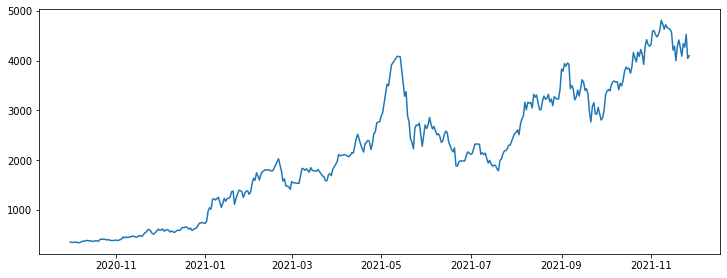

In [19]:
# line plot - 
plt.figure(figsize=(12.2, 4.5))
plt.plot(df2['close'])

# modify ticks size
#plt.xticks(fontsize=10)
#plt.yticks(fontsize=10)
#plt.legend('')

# title and labels
#plt.title('Bitcoin closing price USD', fontsize=12)
#plt.xlabel('Date', fontsize=10)
#plt.ylabel('Close price USD', fontsize=10)
plt.show()

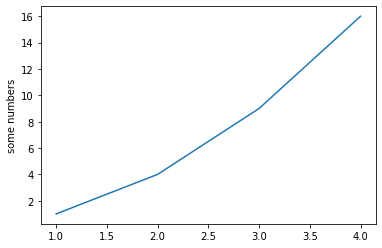

In [20]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.ylabel('some numbers')
plt.show()

In [21]:
# the simple moving average over a period of 10 days
df2['SMA_10'] = df2['close'].rolling(10, min_periods=1, center=True).mean()

# the simple moving average over a period of 20 days
df2['SMA_20'] = df2['close'].rolling(20, min_periods=1, center=True).mean()

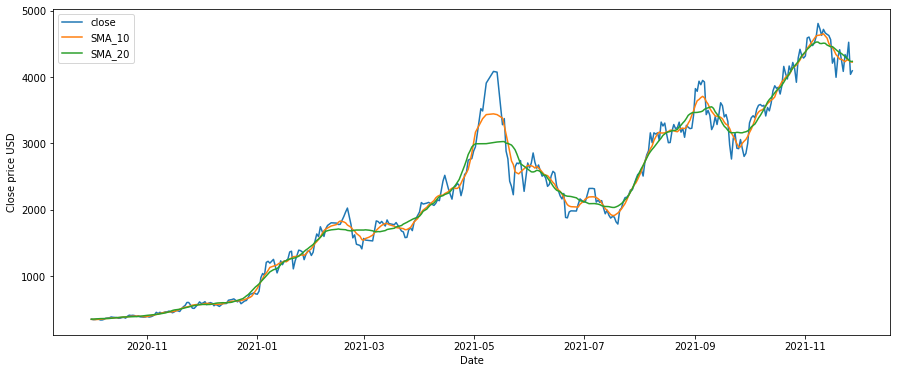

In [22]:
plt.figure(figsize=(15, 6))
plt.plot(df2['close'], label='close')
plt.plot(df2['SMA_10'], label='SMA_10')
plt.plot(df2['SMA_20'], label='SMA_20')

# modify ticks size
#plt.xticks(fontsize=10)
#plt.yticks(fontsize=10)
plt.legend()

# title and labels
plt.xlabel('Date', fontsize=10)
plt.ylabel('Close price USD', fontsize=10)
plt.show()

In [23]:
# cumulative moving average
df2['CMA'] = df2['close'].expanding().mean()

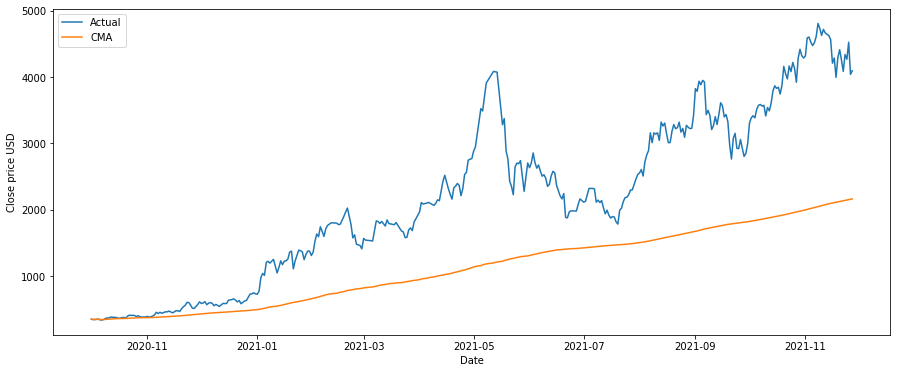

In [24]:
plt.figure(figsize=(15, 6))
plt.plot(df2['close'], label='Actual')
plt.plot(df2['CMA'], label='CMA')

# modify ticks size
#plt.xticks(fontsize=10)
#plt.yticks(fontsize=10)
plt.legend()

# title and labels
plt.xlabel('Date', fontsize=10)
plt.ylabel('Close price USD', fontsize=10)
plt.show()

In [48]:
# exponential moving average
# smoothing factor - 0.1
df2['EMA_12'] = df2['close'].ewm(span=12, adjust=False).mean()

# smoothing factor - 0.3
df2['EMA_26'] = df2['close'].ewm(span=26, adjust=False).mean()

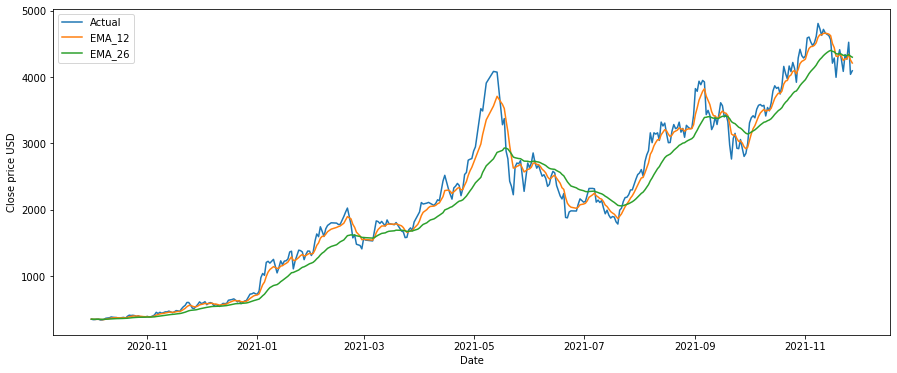

In [49]:
plt.figure(figsize=(15, 6))
plt.plot(df2['close'], label='Actual')
plt.plot(df2['EMA_12'], label='EMA_12')
plt.plot(df2['EMA_26'], label='EMA_26')

# modify ticks size
#plt.xticks(fontsize=10)
#plt.yticks(fontsize=10)
plt.legend()

# title and labels
plt.xlabel('Date', fontsize=10)
plt.ylabel('Close price USD', fontsize=10)
plt.show()

In [50]:
df2['MACD'] = df2['EMA_26'] - df2['EMA_12']
df2['signal'] = df2['MACD'].ewm(span=9, adjust=False).mean()

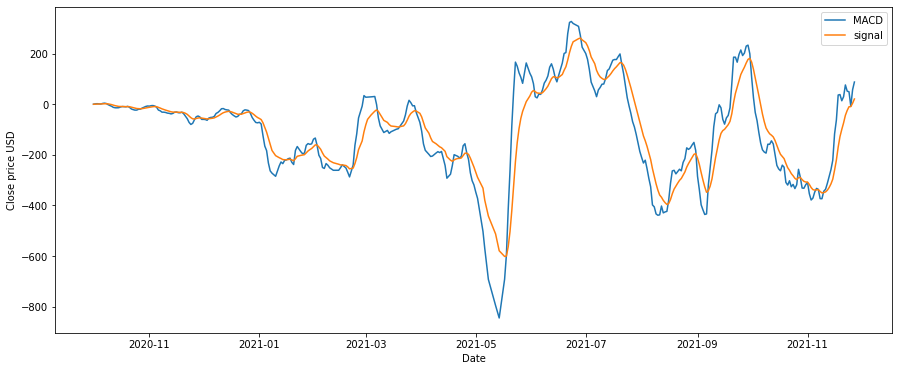

In [51]:
plt.figure(figsize=(15, 6))
plt.plot(df2['MACD'], label='MACD')
plt.plot(df2['signal'], label='signal')

# modify ticks size
#plt.xticks(fontsize=10)
#plt.yticks(fontsize=10)
plt.legend()

# title and labels
plt.xlabel('Date', fontsize=10)
plt.ylabel('Close price USD', fontsize=10)
plt.show()

In [52]:
def buy_sell(signal):
    Buy = []
    Sell = []
    flag = -1
    
    for i in range(len(signal)):
        if signal['MACD'][i] > signal['signal'][i]:
            Sell.append(np.NaN)
            if flag != 1:
                Buy.append(signal['close'][i])
                flag = 1
            else:
                Buy.append(np.NaN)
        elif signal['MACD'][i] < signal['signal'][i]:
            Buy.append(np.NaN)
            if flag != 0:
                Sell.append(signal['close'][i])
                flag = 0
            else:
                Sell.append(np.NaN)
        else:
            Buy.append(np.NaN)
            Sell.append(np.NaN)
        
        
    return (Buy, Sell)
        
        
        
        
        
        
        
        
        
        

In [53]:
a = buy_sell(df2)
df2['Buy'] = a[0]
df2['Sell'] = a[1]


In [54]:
df2

,open,high,low,close,volume,SMA_10,SMA_20,CMA,EMA_12,EMA_26,MACD,signal,Buy,Sell
date,,,,,,,,,,,,,,
2020-10-01,359.83,369.00,345.51,352.82,355014.85910,350.146000,352.008000,352.820000,352.820000,352.820000,0.000000,0.000000,NaN,NaN
2020-10-02,352.83,354.55,334.24,345.94,385179.95368,348.598333,354.012727,349.380000,350.854286,352.310370,1.456085,0.291217,345.94,NaN
2020-10-03,345.60,351.00,343.70,347.04,213050.09393,347.560000,356.706667,348.600000,349.764490,351.919973,2.155483,0.664070,NaN,NaN
2020-10-04,345.94,354.37,343.96,352.16,232134.31940,347.872500,358.591538,349.490000,350.448921,351.937752,1.488831,0.829022,NaN,NaN
2020-10-05,352.34,356.10,348.54,352.77,245437.18328,349.968889,360.019286,350.146000,351.112087,351.999400,0.887314,0.840681,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-23,4086.28,4385.59,4059.62,4339.44,505642.52720,4231.819000,4310.020000,2142.543325,4275.727352,4327.415169,51.687817,-24.643339,NaN,NaN
2021-11-24,4339.45,4373.94,4167.65,4269.36,443947.09830,4257.921111,4286.145000,2148.096371,4273.908109,4323.114786,49.206678,-9.873336,NaN,NaN
2021-11-25,4270.10,4550.00,4248.27,4524.79,443586.35120,4253.316250,4259.963846,2154.285677,4345.588649,4338.053691,-7.534958,-9.405660,NaN,NaN


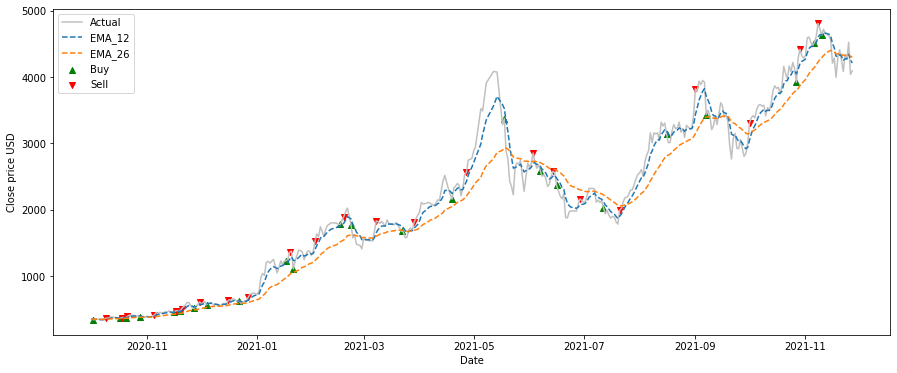

In [55]:
plt.figure(figsize=(15, 6))
plt.plot(df2['close'], label='Actual', color='silver')
plt.plot(df2['EMA_12'], label='EMA_12', linestyle='dashed')
plt.plot(df2['EMA_26'], label='EMA_26', linestyle='dashed')
plt.scatter(df2.index, df2['Buy'], color='green', label='Buy', marker='^')
plt.scatter(df2.index, df2['Sell'], color='red', label='Sell', marker='v')


# modify ticks size
#plt.xticks(fontsize=10)
#plt.yticks(fontsize=10)
plt.legend()

# title and labels
plt.xlabel('Date', fontsize=10)
plt.ylabel('Close price USD', fontsize=10)
plt.show()